In [2]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Suppress warnings (for clean output)
warnings.filterwarnings("ignore", category=UserWarning)
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

df = pd.read_csv("creditcard.csv")

print("Dataset loaded")
print("Shape:", df.shape)
print(df.head())

Dataset loaded
Shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010  

In [5]:
X = df.drop("Class", axis=1)
y = df["Class"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nClass Distribution:\n",y.value_counts())

Features shape: (284807, 30)
Target shape: (284807,)

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("All normalized feature rows:")
print(pd.DataFrame(X_scaled, columns=X.columns).head(284807))

All normalized feature rows:
            Time        V1        V2        V3        V4        V5        V6  \
0      -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1      -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2      -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3      -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4      -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.641931 -6.065842  6.099286 -6.486245 -1.459641 -3.886611 -1.956690   
284803  1.641952 -0.374121 -0.033356  1.342145 -0.521651  0.629040  0.794446   
284804  1.641974  0.980024 -0.182434 -2.143205 -0.393984  1.905833  2.275262   
284805  1.641974 -0.122755  0.321250  0.463320  0.487192 -0.273836  0.468155   
284806  1.642058 -0.272331 -0.114899  0.463866 -0.357570 -0.009089 -0.487602   

          

In [8]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("After SMOTE:")
print("X:", X_resampled.shape)
print("y:", y_resampled.shape)

After SMOTE:
X: (568630, 30)
y: (568630,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (398041, 30)
Test shape: (170589, 30)


In [10]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("Logistic Regression model trained")

Logistic Regression model trained



Confusion Matrix:
 [[83028  2121]
 [ 6494 78946]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



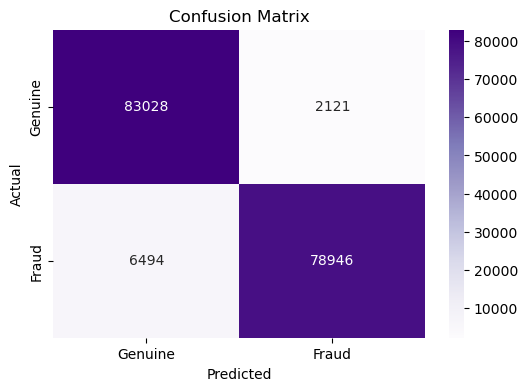

In [11]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

#heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",xticklabels=["Genuine", "Fraud"],yticklabels=["Genuine", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()